In [1]:
import sqlite3 as sql
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# connect to database
conn = sql.connect('NF_player_data.db')

In [3]:
# list table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_list = cursor.fetchall()

In [4]:
# Exclude firepower data tables
tables = []
for i in table_list:
    for j in i:
        if j.find('NF_player') != -1:
            tables.append(j)
display(tables)

['NF_player_07072021',
 'NF_player_07132021',
 'NF_player_07212021',
 'NF_player_07262021',
 'NF_player_08252021',
 'NF_player_09152021']

In [5]:
# Generate X-axis values
dates = []
for t in tables:
    m = t[-8:-6]
    d = t[-6:-4]
    y = t[-4:]
    fusion = m + '.' + d + '.' + y
    dates.append(fusion)
date_columns = pandas.DataFrame(dates)
date_columns.columns = ['Dates']
date_columns['Dates'] = pandas.to_datetime(date_columns['Dates'])

In [6]:
# Player win_rate changes over time
font_plot = {'fontname':'SimSun', 'size':16}
def growth(player_id):
    base_line = "select win_rate, battles from NF_player_07072021 where id = '{}'".format(player_id)
    df = pandas.read_sql(base_line, conn)
    for i in range(1,len(tables)):
        add_line = "select win_rate, battles from {} where id = '{}'".format(tables[i], player_id)
        df_new = pandas.read_sql(add_line, conn)
        df_new.index += i
        df = pandas.concat([df, df_new])
    df = pandas.concat([df,date_columns],axis=1)
    y_low = df['win_rate'].min() - 0.001
    y_base = df['battles'].min() - 50
    y_high = df['win_rate'].max() + 0.001
    y_now = df['battles'].max() + 50
    title_text = '玩家 ' + player_id + " 的胜率变化图"
    title_text_2 = '玩家 ' + player_id + " 的总场数变化图"
    fig = plt.figure(figsize=(12, 4.5))
    subfigs = fig.subfigures(1, 2, wspace=0.07)
    ax = subfigs[0].add_subplot()
    lines = ax.plot(df['Dates'], df['win_rate'])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
    ax.axes.set_ylim(ymin=y_low, ymax=y_high)
    ax.axes.set_title(title_text, **font_plot)
    ax.axes.set_xlabel('日期', **font_plot)
    ax.axes.set_ylabel('胜率', **font_plot)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', rotation_mode="anchor")
    
    bx = subfigs[1].add_subplot()
    lines = bx.plot(df['Dates'], df['battles'])
    bx.axes.set_ylim(ymin=y_base, ymax=y_now)
    bx.axes.set_title(title_text_2, **font_plot)
    bx.axes.set_xlabel('日期', **font_plot)
    bx.axes.set_ylabel('场数', **font_plot)
    plt.setp(bx.get_xticklabels(), rotation=45, horizontalalignment='right', rotation_mode="anchor")

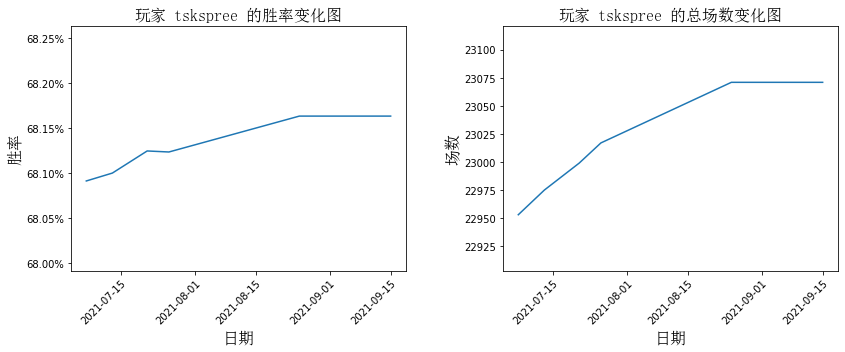

In [7]:
# 老树那件印着嘲讽全海的马甲
growth('tskspree')

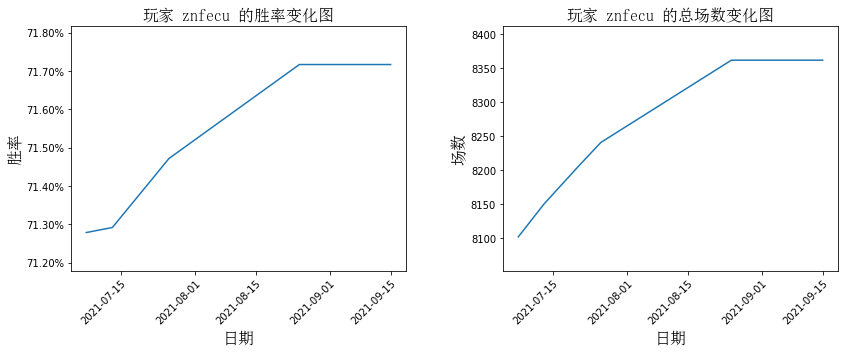

In [8]:
# 老树扮演萌新时常穿的马甲
growth('znfecu')

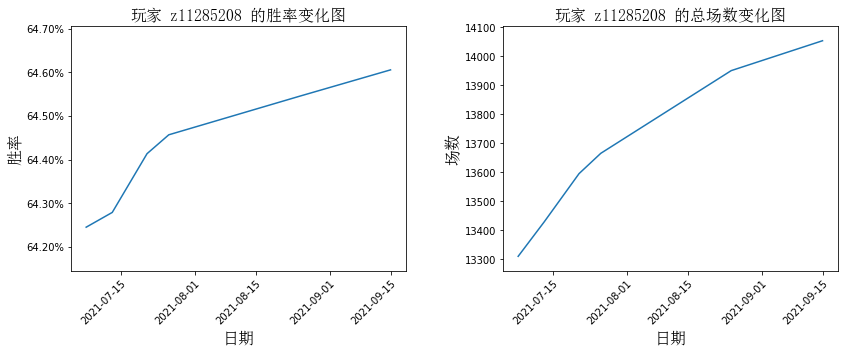

In [9]:
# 蹲在坑里不出来还打不中飞机的狗群主二条
growth('z11285208')

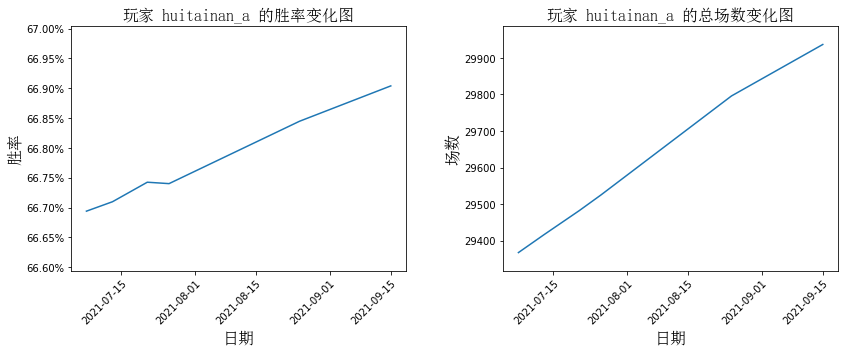

In [10]:
# 在群里开口通常都是来提问的奶嘴
growth('huitainan_a')

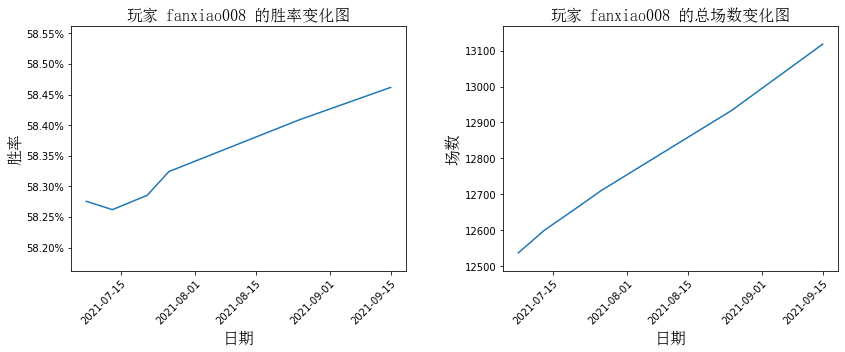

In [11]:
# 比英国都能起雾的青岛大虾
growth('fanxiao008')

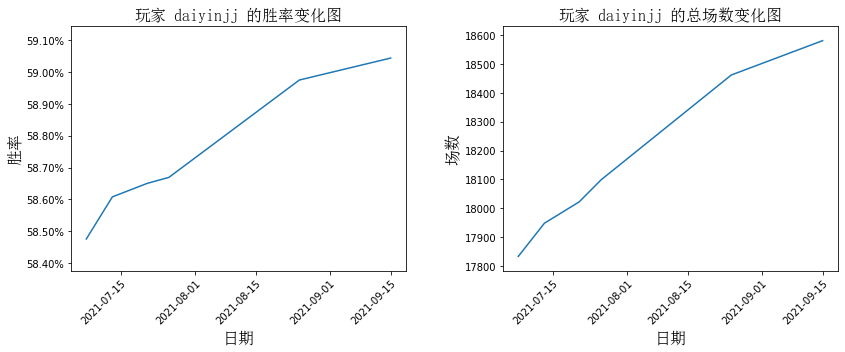

In [12]:
# 公认响声最大的烟雾报警器打印机
growth('daiyinjj')

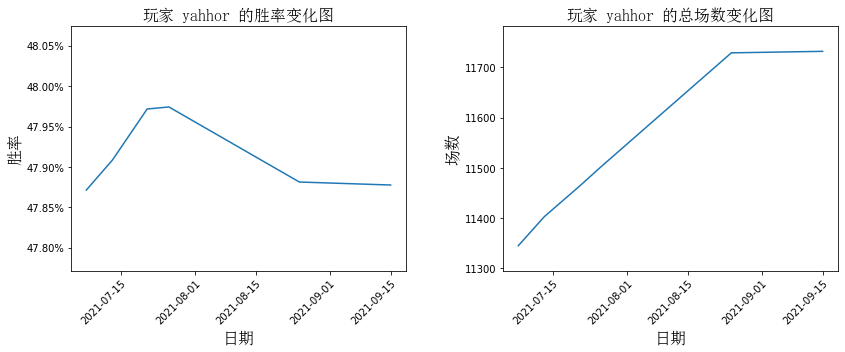

In [13]:
# 飞机永远不会准点的山猪
growth('yahhor')

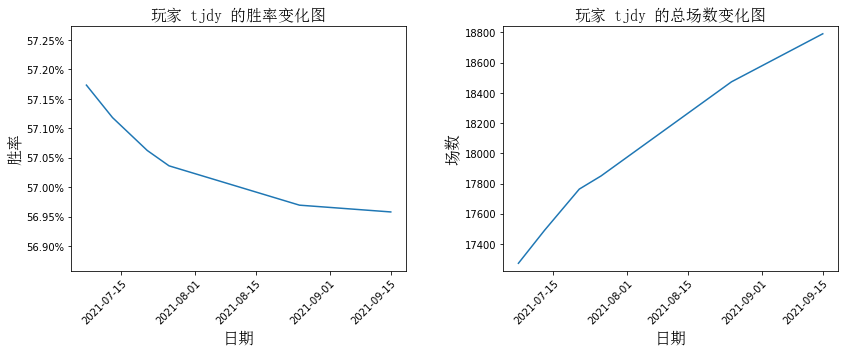

In [14]:
# 家里包养了各色品种鱼雷姬的老刀
growth('tjdy')

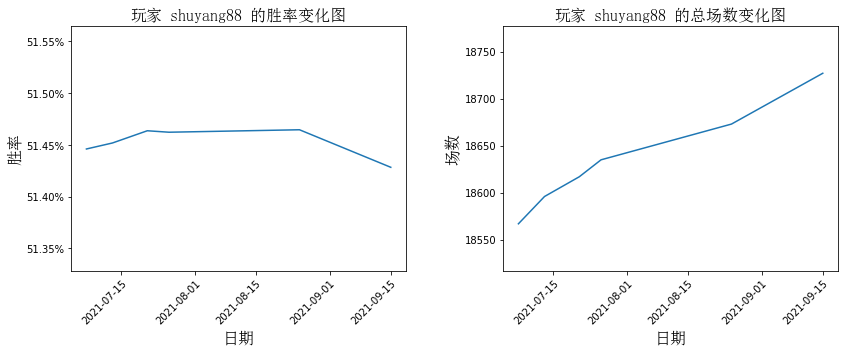

In [15]:
# 自认比葛优还能躺的笨笨
growth('shuyang88')

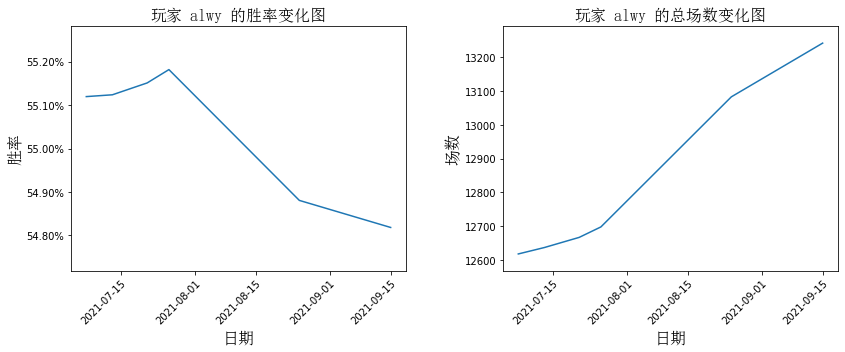

In [16]:
# 动不动就把自己喝进医院的弱鸡阿丽
growth('alwy')

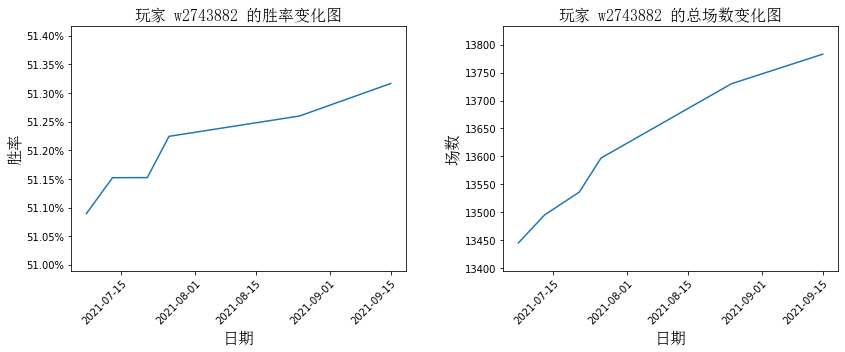

In [17]:
# 传言是急诊室出勤率最高的掏粪专家
growth('w2743882')

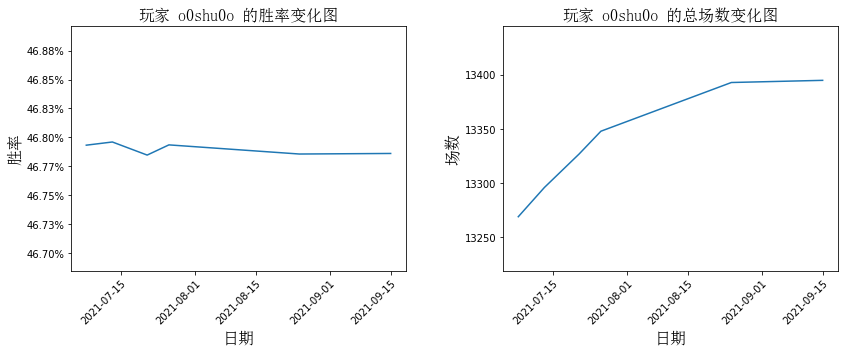

In [18]:
# 号称一定要让侦察活到没油却再也不找老树切磋的奔奔
growth('o0shu0o')

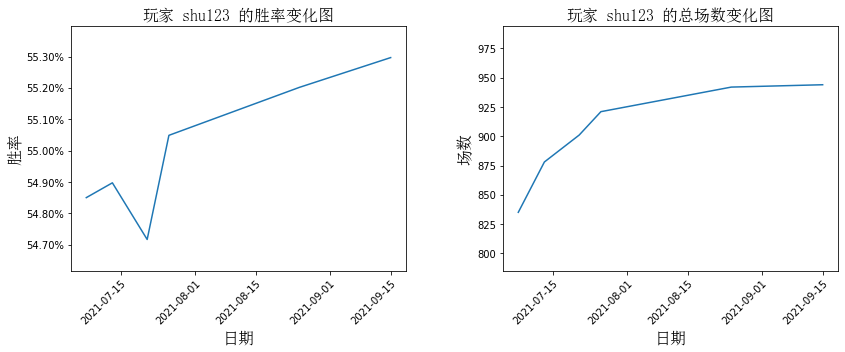

In [19]:
# 据说是被财主眷顾过所以比美国队长盾牌都硬的英国钢盔
growth('shu123')

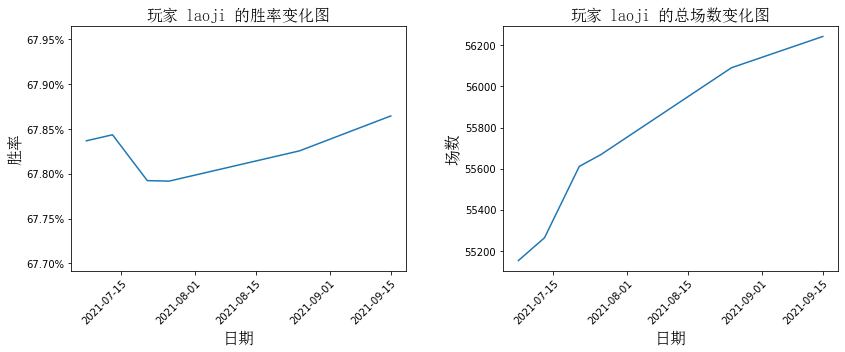

In [20]:
# 常年在超级开闪电能力大船的老纪
growth('laoji')

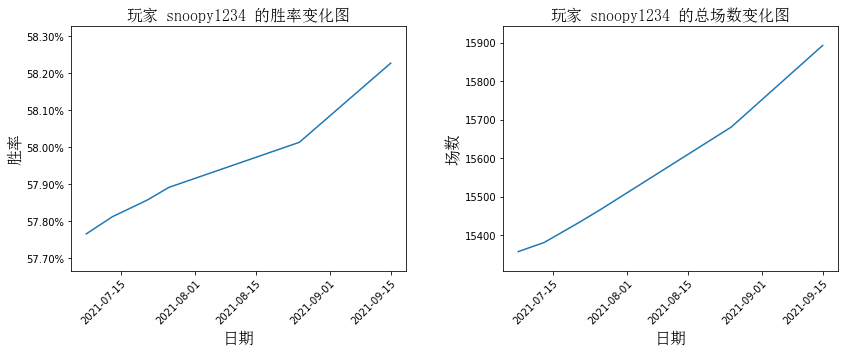

In [21]:
# 最近掌握了黑暗料理界失传绝技之一“子宫型面包”的面点师右手
growth('snoopy1234')

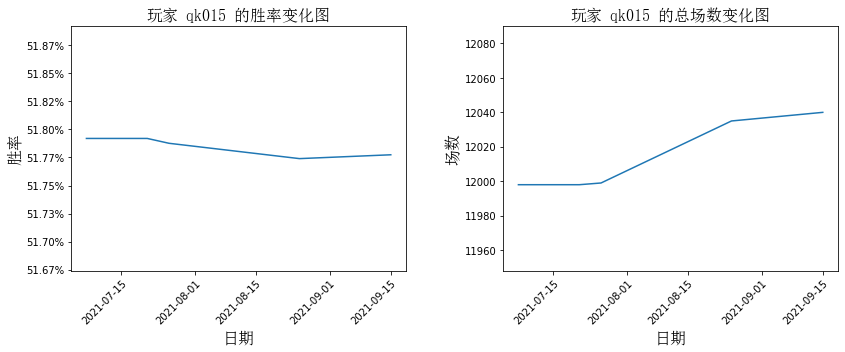

In [22]:
# 自带自嘲功能的暴躁的干饭人
growth('qk015')

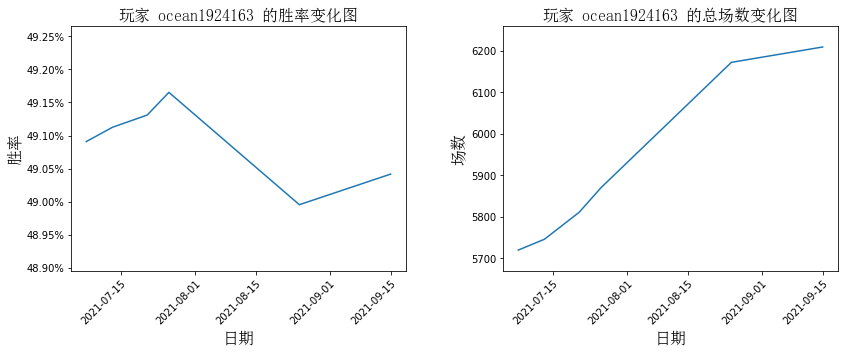

In [23]:
# 天天说自己菜其实打飞机挺厉害的海洋之心
growth('ocean1924163')

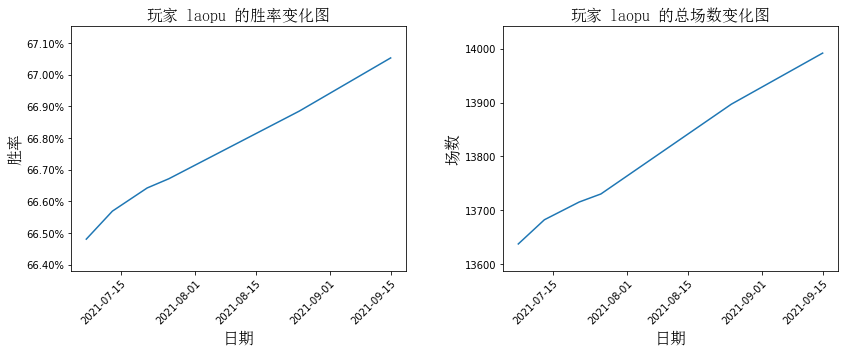

In [24]:
# 骂人比对线手速都快的拔线帝老仆
growth('laopu')

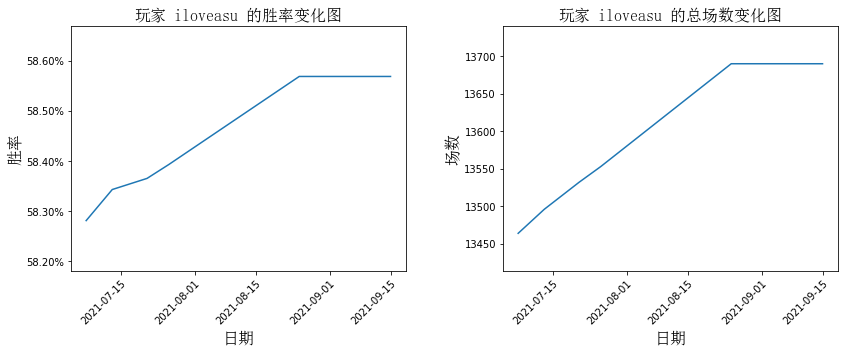

In [25]:
# 拥有自己改装武器库的韭菜
growth('iloveasu')

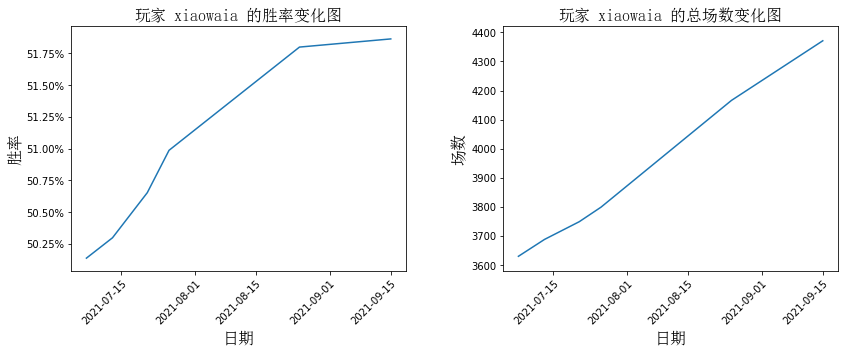

In [26]:
# 号称拉低全海水平并惯用顺次打水漂的男人
growth('xiaowaia')

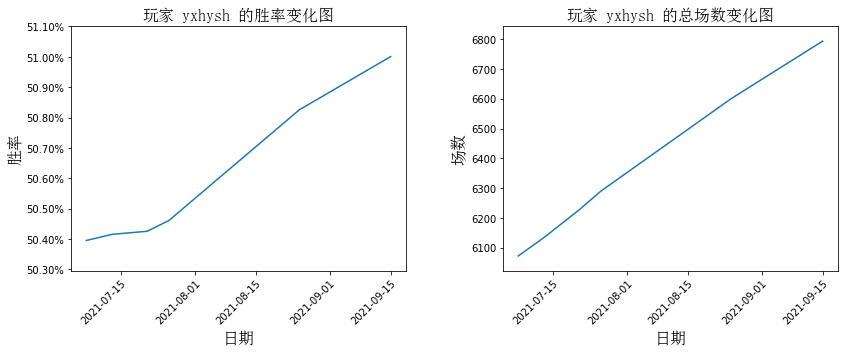

In [27]:
# 据说一坐上大屁股就用脸锁定方向盘的坐莲天尊
growth('yxhysh')

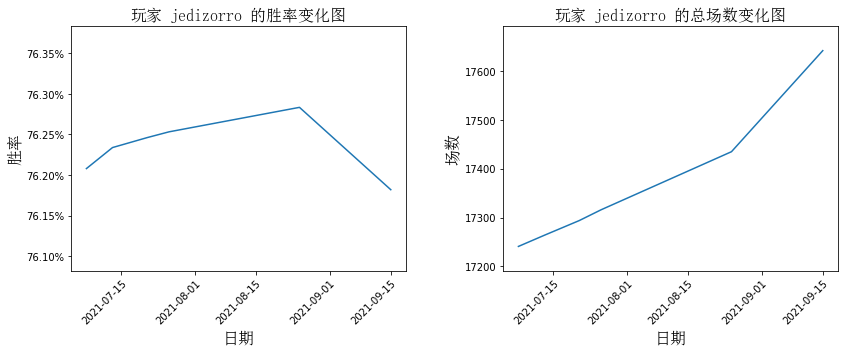

In [28]:
# 最近痴迷上法国轮椅的绝地佐罗
growth('jedizorro')

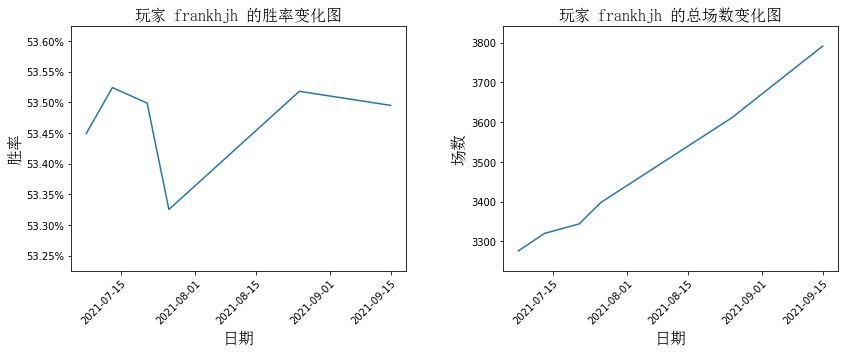

In [29]:
# 虽然不熟但是不小心被抓到的壮丁
growth('frankhjh')

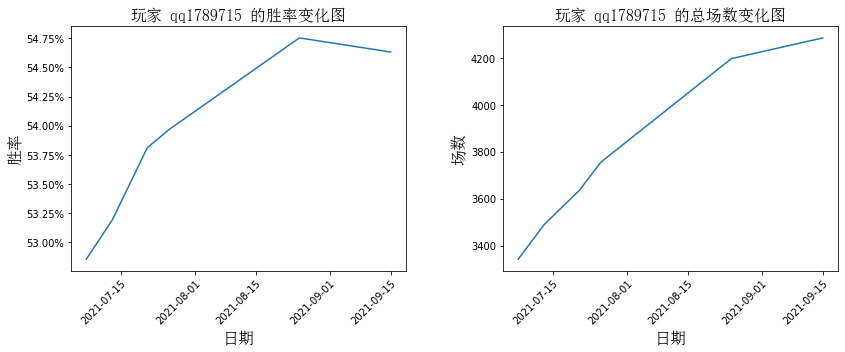

In [30]:
# 一言不合就刷屏还退群的广场舞轰炸机驾驶员风风
growth('qq1789715')

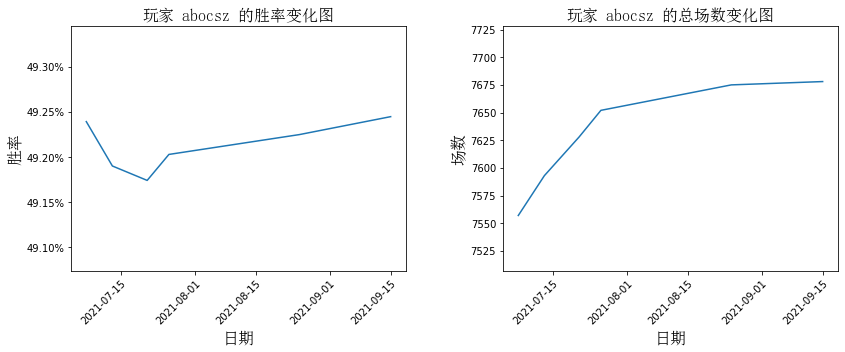

In [31]:
# 为一窝子野兔操碎了十万个心的西厂大总管海子
growth('abocsz')

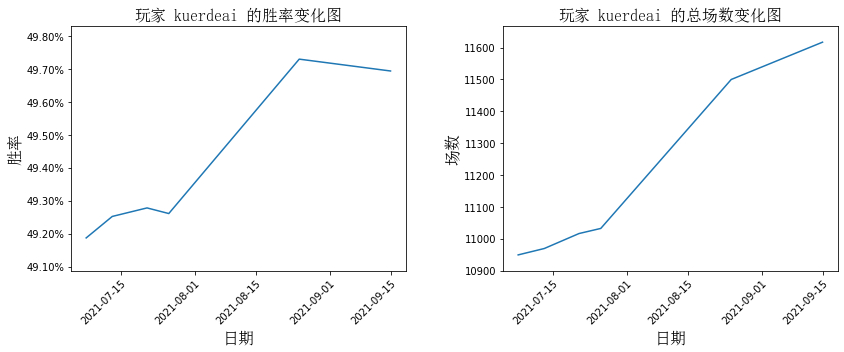

In [32]:
# 自称为了几条七就可以出卖自己灵魂给坑神的大火鸡米酒
growth('kuerdeai')

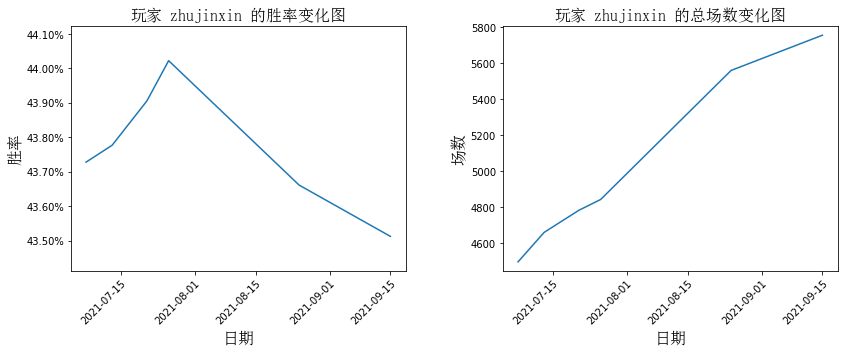

In [33]:
# 被老树实力证明只要冒泡就一定会被示众的半天
growth('zhujinxin')

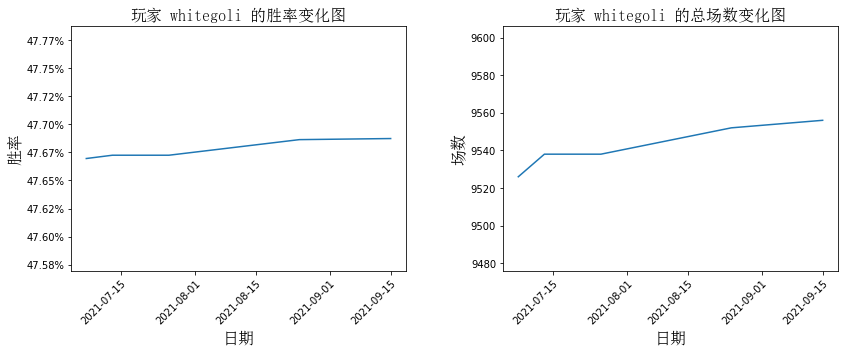

In [34]:
# 一个恶意TK队友不以为耻反以为荣的小屁孩
growth('whitegoli')

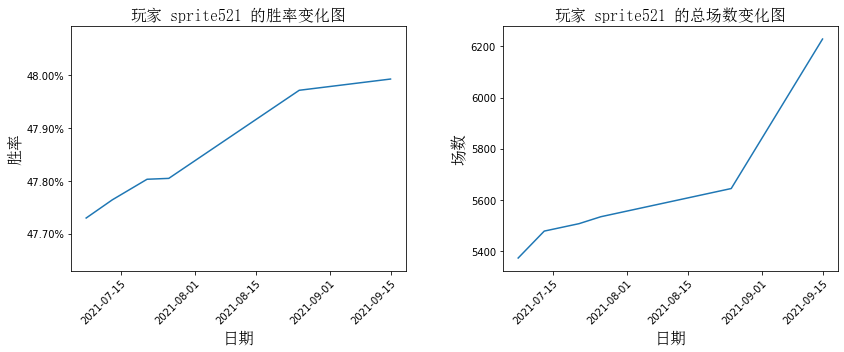

In [36]:
# 据说最近迷上了战斗想要跻身一流控场航妈的仙道
growth('sprite521')